In [5]:
# some plot settings
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['font.family'] = "CMU Serif"
plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams['figure.dpi'] = 120 
plt.rc('text', usetex=True) 

In [6]:
# we will often use the tqdm progress bar
from tqdm.auto import tqdm,trange

## 14. Parrondo’s Paradox

Game B: you have two biased coins. If, at the time just before you select one of the coins to ﬂip, your capital M is a multiple of three dollars, you will choose coin 1, which shows heads with probability 1/10 − $\epsilon$. Otherwise you choose coin 2, which shows heads with probability 3/4 − $\epsilon$. Again, as in game A, heads means you win one dollar and tails means you lose one dollar. It is not as obvious as it is with game A, but game B is a losing game, too. So, as with game A, if you play B over and over, your capital will tend to decline. 

In [9]:
import numpy as np

def gameB() :
    sims = 10**5
    total_evolution = np.zeros(101)
    for i in trange(sims) :
        time_evolution = [0]
        eps = 0.005
        capital = 0
        for k in range(100) :
            # if the capital is a multiple of 3
            if capital % 3 == 0 :
                toss = np.random.choice([1,-1],p=[0.1-eps,0.9+eps])
            else :
                toss = np.random.choice([1,-1],p=[0.75-eps,0.25+eps])
            capital = capital + toss
            time_evolution = time_evolution + [capital]
        total_evolution = np.add(total_evolution, time_evolution)
    ensemble_avg = total_evolution/sims 
    plt.title('Game B')
    plt.xlabel('Timesteps ($k$)')
    plt.ylabel('Mean capital ($M_k$)')
    plt.plot(range(101),ensemble_avg)

  0%|          | 0/100000 [00:00<?, ?it/s]

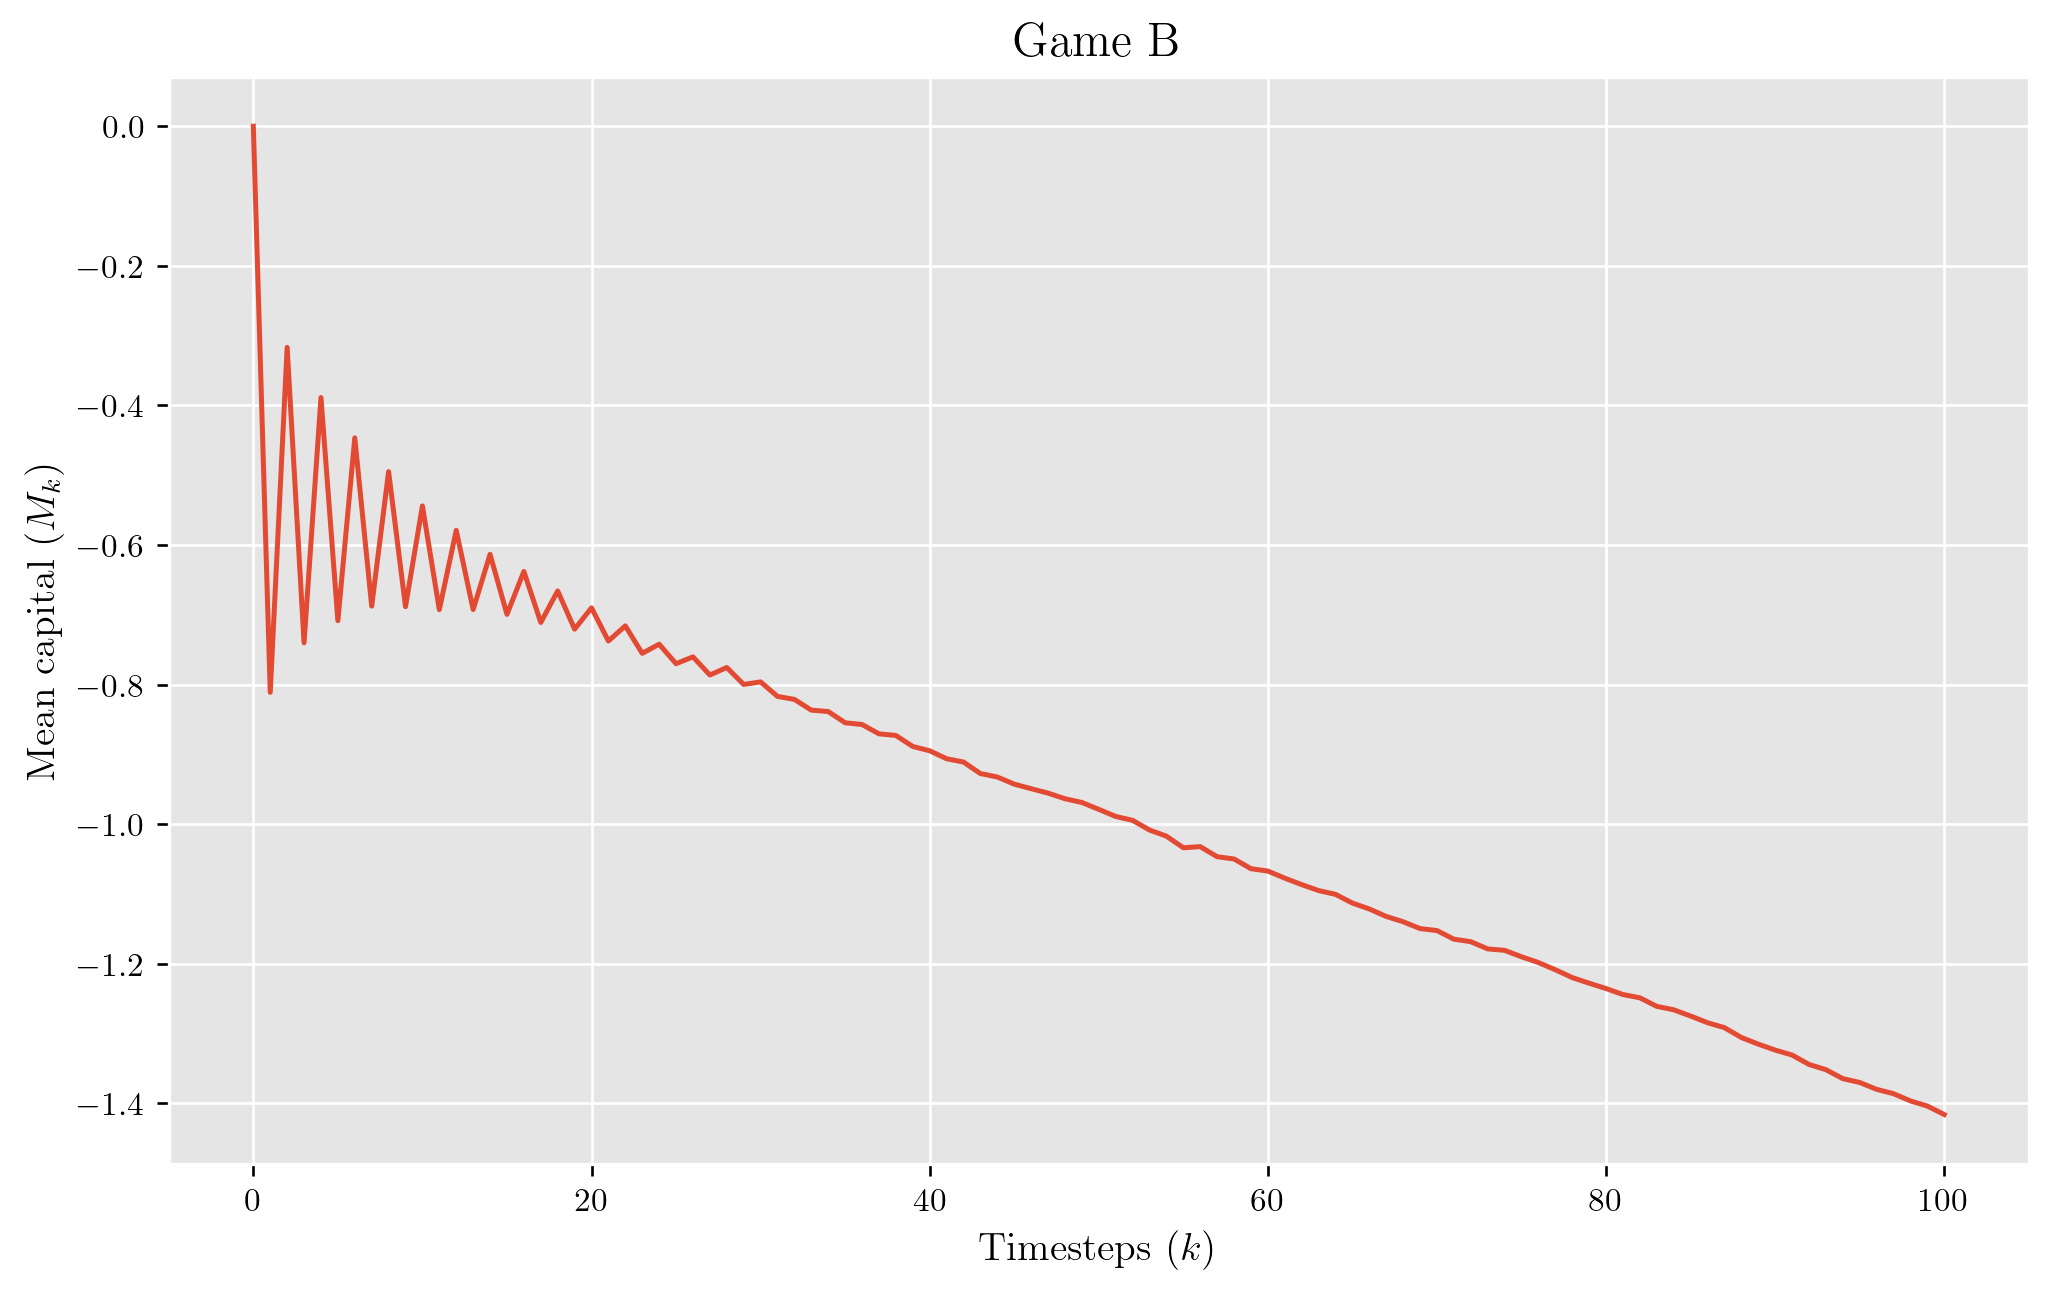

In [10]:
gameB()

Game A: you ﬂip a so-called biased coin, i.e., a coin with unequal probabilities of showing heads and tails. Let’s say that if the coin shows heads (with probability 1/2 − $\epsilon$, $\epsilon$ > 0), you win one dollar, otherwise you lose one dollar. It takes no great mathematical insight to appreciate that, on average, game A is a losing game. That is, if you play game A over and over, sometimes you’ll win and the other times you’ll lose, but you’ll lose more than you win, and so, as you play more and more A games, your ﬁnancial situation, as measured by your capital M, will worsen (M will decline).

In [17]:
def gameA() :
    sims = 10**5
    total_evolution = np.zeros(101)
    for i in trange(sims) :
        time_evolution = [0]
        eps = 0.005
        capital = 0
        for k in range(100) :
            toss = np.random.choice([1,-1],p=[0.5-eps,0.5+eps])
            capital = capital + toss
            time_evolution = time_evolution + [capital]
        total_evolution = np.add(total_evolution, time_evolution)
    ensemble_avg = total_evolution/sims 
    plt.title('Game A')
    plt.xlabel('Timesteps ($k$)')
    plt.ylabel('Mean capital ($M_k$)')
    plt.plot(range(101),ensemble_avg,'b')

  0%|          | 0/100000 [00:00<?, ?it/s]

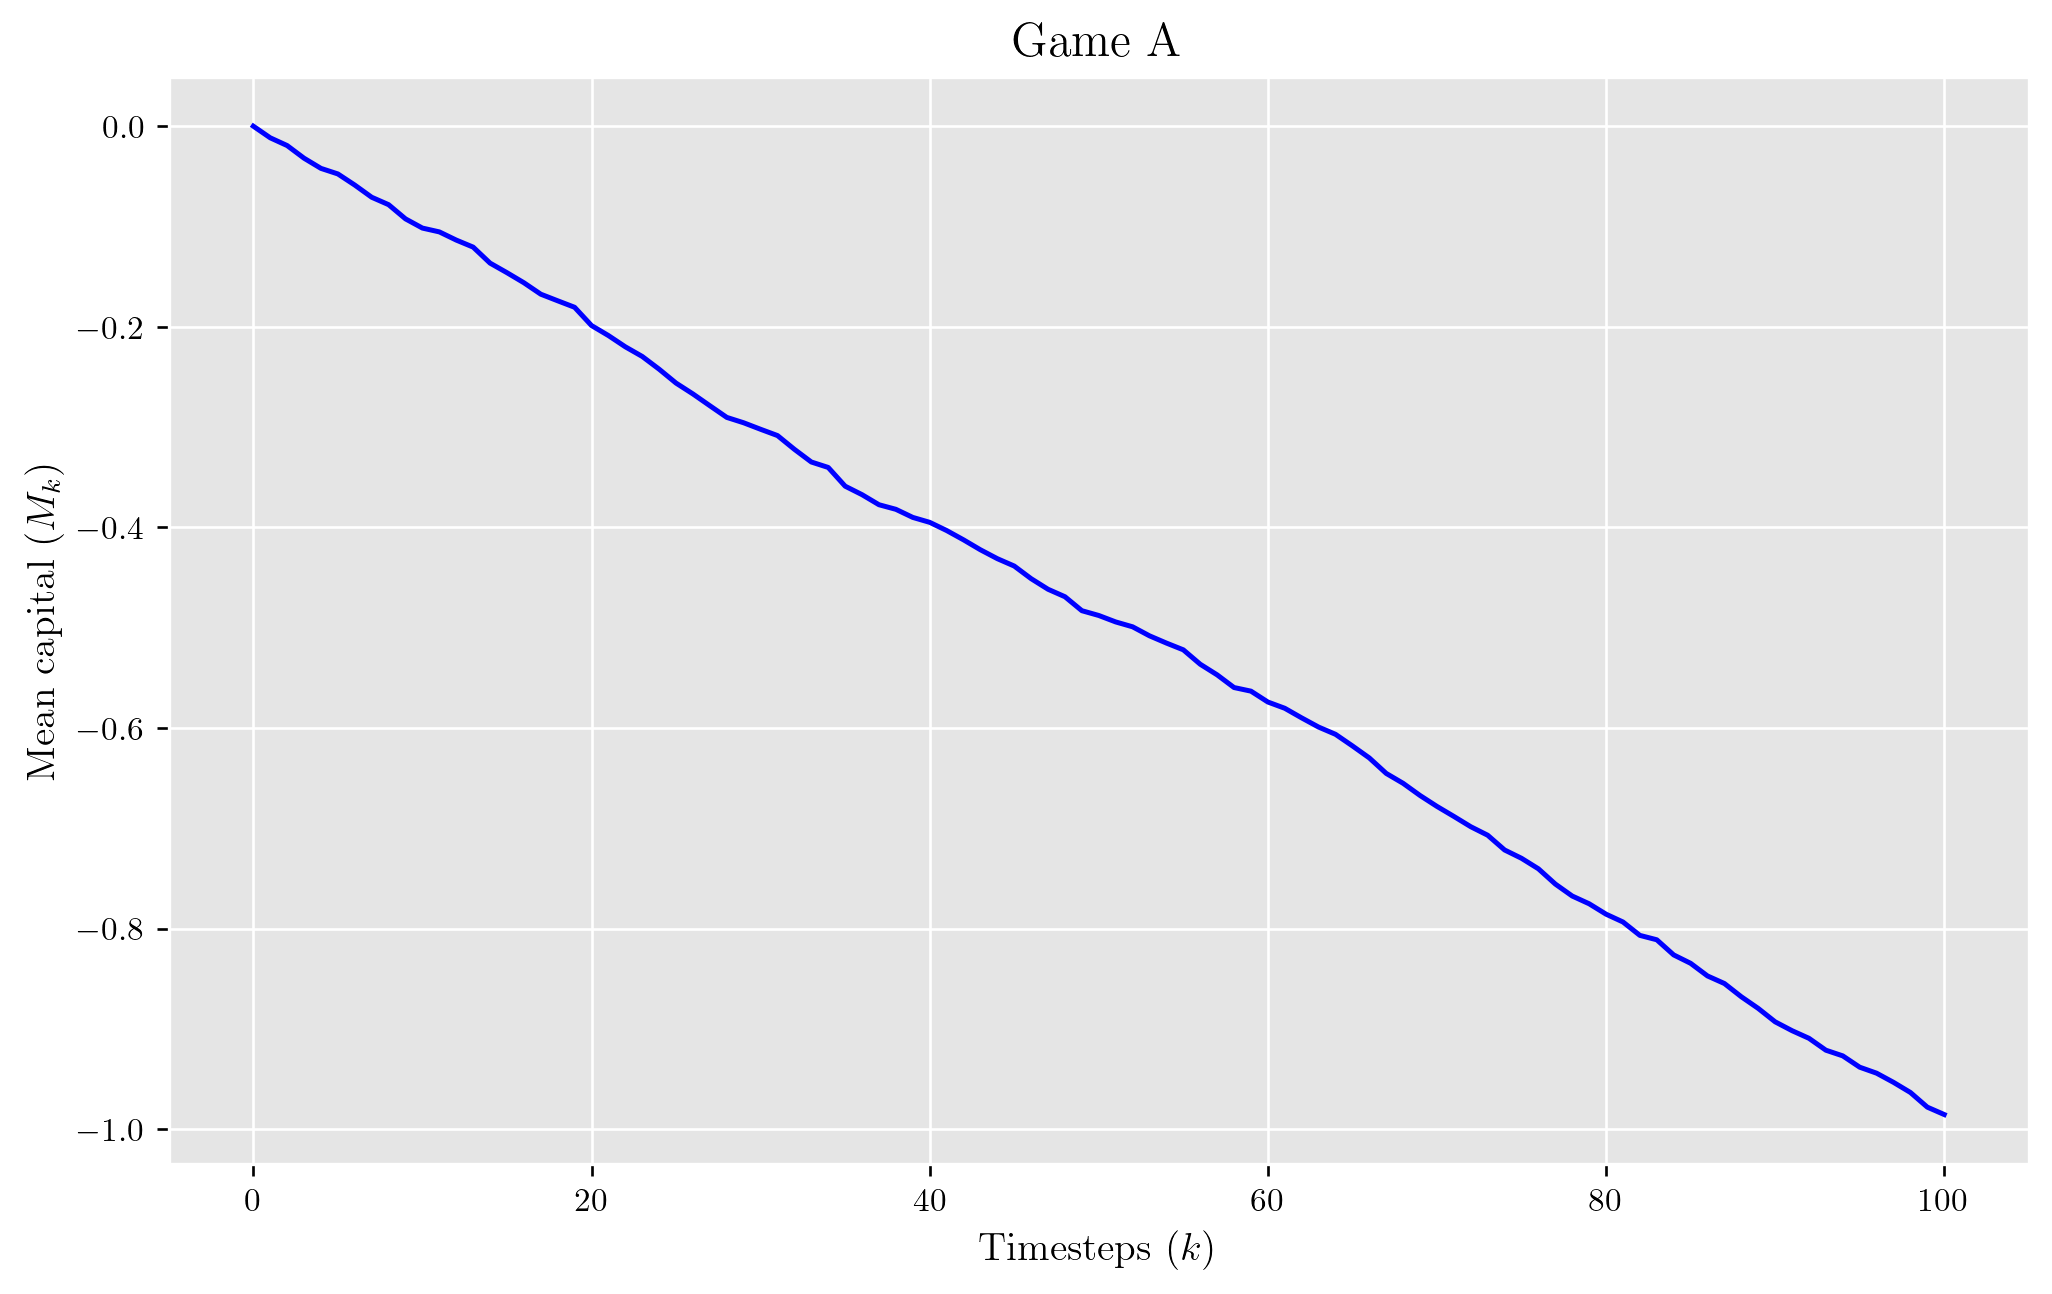

In [18]:
gameA()

Suppose now that you do the following: during a long sequence of games you randomly switch back and forth between playing loser game A and playing loser game B. It would seem obvious to most people, that your capital M will deﬁnitely decline as you play. But is that really so? That question prompts your two assignments. Write a Monte Carlo simulation of a gambler switching randomly between A and B during a long sequence of games, and plot the gambler’s capital M as a function of time (imagine playing at the rate of one coin ﬂip per second).

In [19]:
def gameAorB() :
    sims = 10**5
    total_evolution = np.zeros(101)
    for i in trange(sims) :
        time_evolution = [0]
        eps = 0.005
        capital = 0
        for k in range(100) :
            # choose game A or B with equal probability
            game = np.random.choice(["A","B"])
            if game == 'A' :
                toss = np.random.choice([1,-1],p=[0.5-eps,0.5+eps])
            elif game == 'B' :
                if capital % 3 == 0 :
                    toss = np.random.choice([1,-1],p=[0.1-eps,0.9+eps])
                else :
                    toss = np.random.choice([1,-1],p=[0.75-eps,0.25+eps])
            capital = capital + toss
            time_evolution = time_evolution + [capital]
        total_evolution = np.add(total_evolution, time_evolution)
    ensemble_avg = total_evolution/sims  
    plt.title('New game (A/B)')
    plt.xlabel('Timesteps ($k$)')
    plt.ylabel('Mean capital ($M_k$)')
    plt.plot(range(101),ensemble_avg,'g')

  0%|          | 0/100000 [00:00<?, ?it/s]

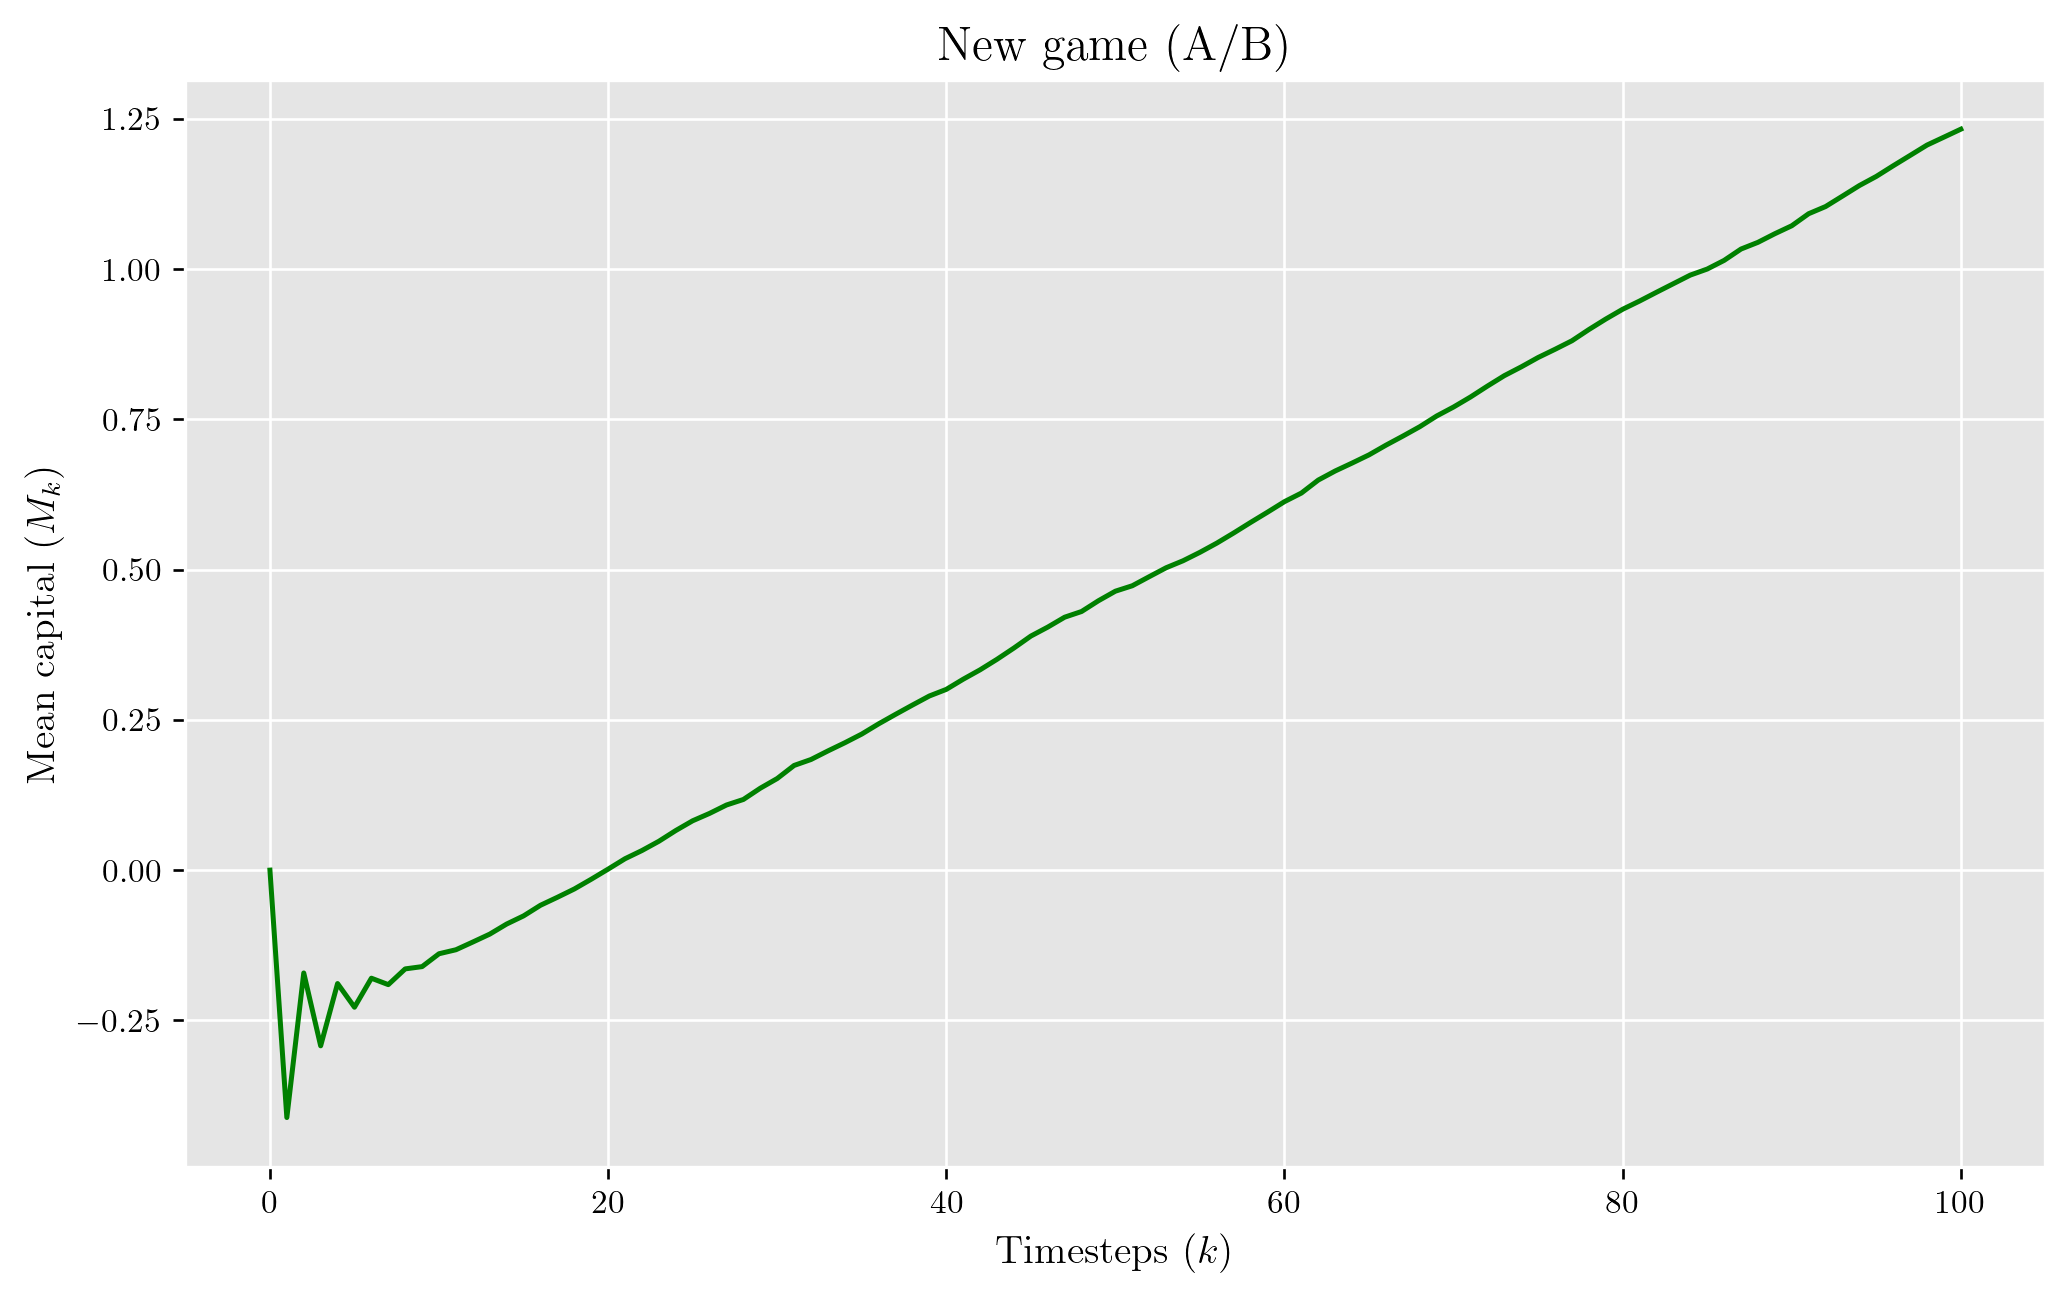

In [20]:
gameAorB()

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

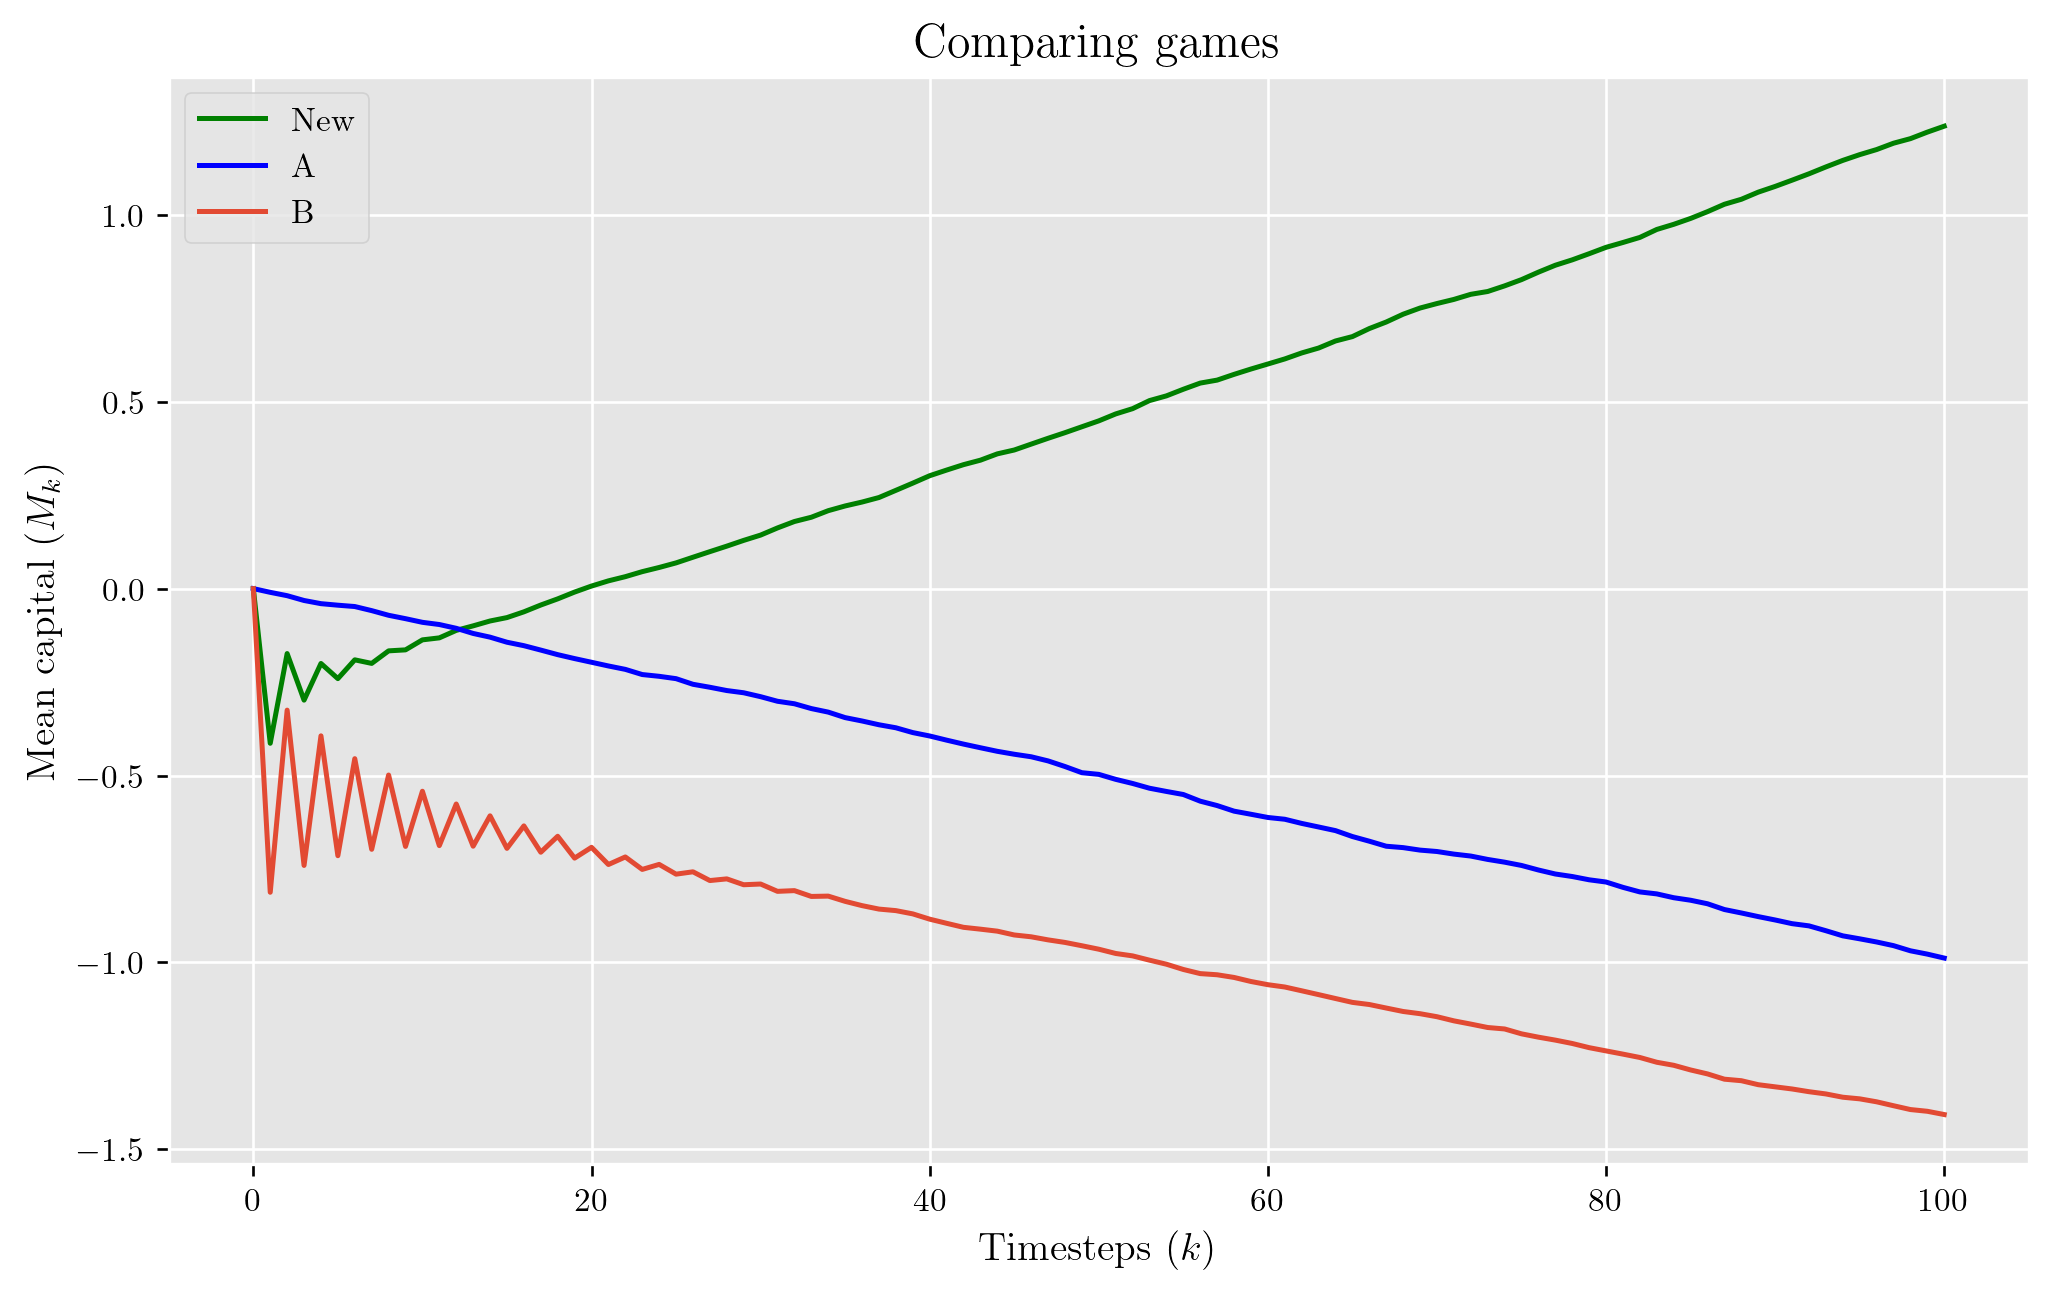

In [25]:
gameAorB()
gameA()
gameB()
plt.legend(['New','A','B'])
plt.title('Comparing games')
plt.show()

The games A and B have a negative drift while the new game, which is a random combination of A and B, has positive drift!